In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.cluster import KMeans

In [3]:
data = pd.read_csv('3.12. Market Segmentation.csv')

In [4]:
data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


In [5]:
#Satisfaction -> müşteriye sorulur. 0-10 arasında bir skor söyler. bu değişken discretetir.
#loyalty -> number of purchase üzerinden hesaplanılmış. -2.5 - 2.5 arasında. continuous. yani standardized.

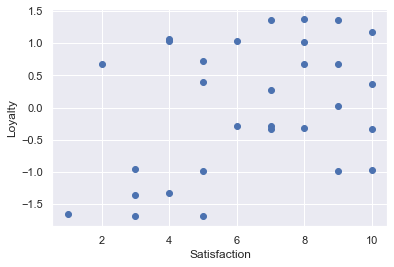

In [8]:
plt.scatter(data['Satisfaction'],data['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

In [9]:
# bakıldığında 2 cluster gibi görülüyor. fakat graphı 4'e bölüp sınıflandırdığımızda, low loyalty-low satisfaction, low-loyalty-high satisfaction
# high loyalty-low satisfaction , high loyalty-high satisfaction olmak üzere 4 ayrı cluster görünüyor.

In [10]:
x = data.copy()

In [25]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(n_clusters=2)

In [26]:
clusters = x.copy()
clusters['cluster_pred']=kmeans.fit_predict(x)

Text(0, 0.5, 'Loyalty')

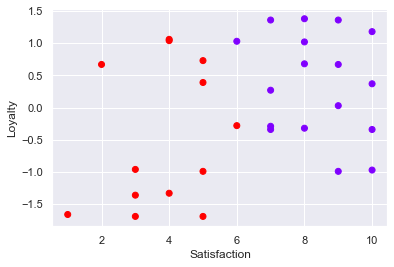

In [27]:
plt.scatter(clusters['Satisfaction'], clusters['Loyalty'],c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

In [19]:
#satisfaction değerleri daha yüksek olduğu için daha önemli bir feature olarak değerlendirilip 2 cluster oluşturuldu. aslında sadece satisfactiona göre bir cluster oluşturulmuş oldu.
#bundan kaçınmak için satisfactionı standardize etmemiz gerekiyor.

In [20]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)

In [21]:
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

In [29]:
wcss = []

for i in range (1,10):
    kmeans= KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
    
wcss

C:\Users\TCZSAHTIYAN\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[59.999999999999986,
 29.818973034723143,
 17.913349527387968,
 10.247181805928422,
 7.792695153937187,
 6.660166530521062,
 5.348079410290981,
 4.393997941560441,
 3.8352787725108968]

Text(0, 0.5, 'wcss')

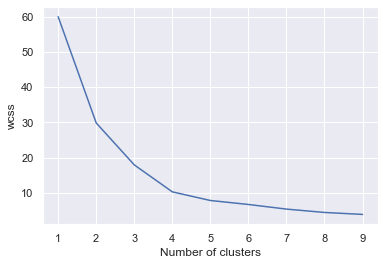

In [30]:
plt.plot(range(1,10),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('wcss')

In [33]:
kmeans_new = KMeans(2)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)

In [34]:
clusters_new

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,1
1,6,-0.28,0
2,5,-0.99,1
3,7,-0.29,0
4,4,1.06,0
5,1,-1.66,1
6,10,-0.97,0
7,8,-0.32,0
8,8,1.02,0
9,8,0.68,0


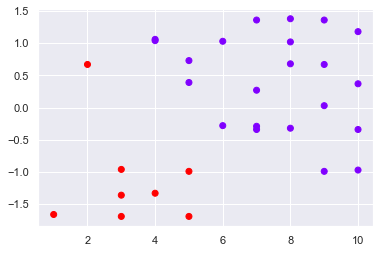

In [35]:
plt.scatter(clusters_new['Satisfaction'], clusters_new['Loyalty'], c = clusters_new['cluster_pred'], cmap = 'rainbow')

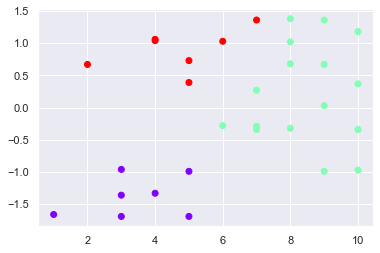

In [36]:
kmeans_new = KMeans(3)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)
plt.scatter(clusters_new['Satisfaction'], clusters_new['Loyalty'], c = clusters_new['cluster_pred'], cmap = 'rainbow')

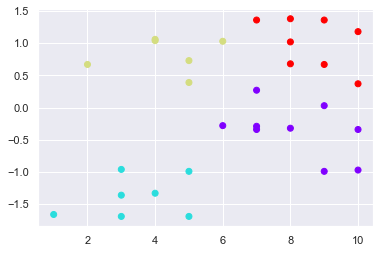

In [37]:
kmeans_new = KMeans(4)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)
plt.scatter(clusters_new['Satisfaction'], clusters_new['Loyalty'], c = clusters_new['cluster_pred'], cmap = 'rainbow')

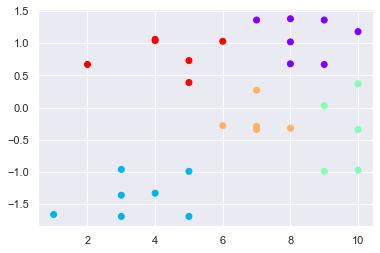

In [38]:
kmeans_new = KMeans(5)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)
plt.scatter(clusters_new['Satisfaction'], clusters_new['Loyalty'], c = clusters_new['cluster_pred'], cmap = 'rainbow')

In [40]:
#4 en iyisi. 5 de idare eder.

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,